In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
rootPath = 'C:/Users/soyeon/Desktop/soyeon_etc/computer_vision_code/실습/Plant_Disease/vision'

In [3]:
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.2,)
test_datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train_generator=train_datagen.flow_from_directory(os.path.join(rootPath, 'training_set'),
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=16,
                                                 subset='training')

val_generator=train_datagen.flow_from_directory(os.path.join(rootPath, 'training_set'),
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=8,
                                                 subset='validation')

test_gemerator=test_datagen.flow_from_directory(os.path.join(rootPath, 'test_set'),
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=15,
                                                 shuffle=False)

Found 1668 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
from tensorflow.keras.applications import Xception
convlayer=Xception(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

In [6]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

In [7]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'],
              optimizer=opt)

In [8]:
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
105/105 [==============================] - 12s 78ms/step - loss: 0.5214 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.1331 - val_sparse_categorical_accuracy: 0.9591
Epoch 2/5
105/105 [==============================] - 6s 60ms/step - loss: 0.1560 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.1705 - val_sparse_categorical_accuracy: 0.9495
Epoch 3/5
105/105 [==============================] - 6s 60ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9690 - val_loss: 0.1057 - val_sparse_categorical_accuracy: 0.9663
Epoch 4/5
105/105 [==============================] - 6s 60ms/step - loss: 0.0555 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.1510 - val_sparse_categorical_accuracy: 0.9447
Epoch 5/5
105/105 [==============================] - 6s 60ms/step - loss: 0.0850 - sparse_categorical_accuracy: 0.9761 - val_loss: 0.2274 - val_sparse_categorical_accuracy: 0.9399


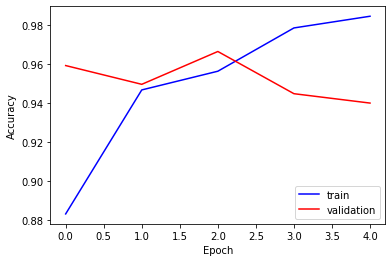

In [9]:
plt.plot(history.history['sparse_categorical_accuracy'],c='blue')
plt.plot(history.history['val_sparse_categorical_accuracy'],c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

In [10]:
model.evaluate(test_gemerator)

1/1 [==============================] - 0s 462ms/step - loss: 0.0403 - sparse_categorical_accuracy: 1.0000


[0.04031794145703316, 1.0]

In [11]:
pred = model.predict(test_gemerator)

In [12]:
img_list = test_gemerator.filenames

In [13]:
pred_list = []
for i in range(len(pred)):
    pred_list.append(np.argmax(pred[i]))

In [14]:
df = pd.DataFrame(list(zip(img_list, pred_list)), columns =['Name', 'pred'])
print(pred_list)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]


In [15]:
df.to_csv('submission_1215_Xception_End.csv', index=False)